# Real Data Example: PhysioNet Challenge 2012 Data in the `EHRData` Format


This tutorial demonstrates how `EHRData` structures real-world longitudinal clinical data using the **PhysioNet Challenge 2012** dataset as an example.

```{note}
It is helpful to check out the [Getting started with EHRData](getting_started) to learn the basics of `EHRData` before diving into this tutorial.
```

The [PhysioNet Challenge 2012](https://physionet.org/content/challenge-2012/1.0.0/) dataset contains ICU patient data collected during the first 48 hours of admission. It was used for predicting in-hospital mortality.

## Dataset Overview

The dataset includes:
- **12,000 ICU stays** from three hospitals (set-a, set-b, set-c)
- **37 clinical variables** measured over time (vitals, lab values, etc.)
- **4 static features**: Age, Gender, ICUType, Height
- **Outcomes**: In-hospital death, survival time, and SAPS-I score

Let's explore how `EHRData` organizes this complex data structure!


## Loading the Dataset

The `ehrdata` package provides multiple datasets out-of-the-box, and this dataset is one of them.

See :func:`~ehrdata.datasets.physionet2012` for more details about how the dataset is loaded.

In [1]:
import ehrdata as ed
import numpy as np
import matplotlib.pyplot as plt

This downloads the data if needed and processes it into an `EHRData` object:


In [ ]:
edata = ed.dt.physionet2012(layer="tem_data")
edata

View of EHRData object with n_obs × n_vars × n_t = 11988 × 37 × 48
    obs: 'set', 'Age', 'Gender', 'Height', 'ICUType', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival', 'In-hospital_death'
    var: 'Parameter'
    tem: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47'
    layers: 'tem_data'
    shape of .tem_data: (11988, 37, 48)

```{note}
The first time you run this, it will download ~140MB of data. Subsequent runs will use the cached version.
```


## Reminder: the EHRData Structure

<p style="text-align:center; padding: 2em 0;">
<img src="../_static/tutorial_images/ehrdata_logo.png" width="400" height="400" alt="Logo">
</p>

An `EHRData` object organizes data across three dimensions:

- **`n_obs`**: Number of observations (patients/ICU stays)
- **`n_vars`**: Number of variables (clinical parameters)
- **`n_tem`**: Number of temporal measurements (time points)

Let's explore each component with PhysioNet Challenge 2012 data!


### The `.layers` Attribute: Time Series Data

The `.layers` attribute contains the 3D tensor of shape `(n_obs, n_vars, n_tem)` with all time series measurements:


In [7]:
print(f"Shape of layers: {edata.layers['tem_data'].shape}")
print(f"Data type: {edata.layers['tem_data'].dtype}")
print("\nThis represents:")
print(f"  - {edata.n_obs} patients")
print(f"  - {edata.n_vars} clinical variables")
print(f"  - {edata.n_t} time intervals")

Shape of layers: (11988, 37, 48)
Data type: float64

This represents:
  - 11988 patients
  - 37 clinical variables
  - 48 time intervals


### The `.obs` Attribute: Static Patient Metadata

The `.obs` DataFrame contains static information and outcomes for each patient:


In [8]:
edata.obs.head()

,set,Age,Gender,Height,ICUType,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
RecordID,,,,,,,,,,
132539,set-a,54.0,0.0,-1.0,4.0,6,1,5,-1,0
132540,set-a,76.0,1.0,175.3,2.0,16,8,8,-1,0
132541,set-a,44.0,0.0,-1.0,3.0,21,11,19,-1,0
132543,set-a,68.0,1.0,180.3,3.0,7,1,9,575,0
132545,set-a,88.0,0.0,-1.0,3.0,17,2,4,918,0


The `.obs` table includes:
- **Static features**: Age, Gender, ICUType, Height
- **Outcomes**: In-hospital_death, Survival, SAPS-I (severity score)
- **Metadata**: set (which hospital data came from)


### The `.var` Attribute: Dynamic Variable Metadata

The `.var` DataFrame contains information about each clinical variable being measured:


In [9]:
print(f"Number of variables: {edata.n_vars}\n")
print("All clinical parameters:")
edata.var

Number of variables: 37

All clinical parameters:


,Parameter
Parameter,
ALP,ALP
ALT,ALT
AST,AST
Albumin,Albumin
BUN,BUN
Bilirubin,Bilirubin
Cholesterol,Cholesterol
Creatinine,Creatinine
DiasABP,DiasABP


### The `.tem` Attribute: Temporal Information

The `.tem` DataFrame contains information about the time intervals:


In [11]:
print(f"Number of time intervals: {edata.n_t}\n")
edata.tem.head(10)

Number of time intervals: 48



,interval_step
interval_step,
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


## Exploring Individual Patients

Let's look at a specific patient's data and visualize their vital signs over time:


In [12]:
# Select the first patient
patient_id = edata.obs_names[0]
print(f"Patient ID: {patient_id}\n")

# View their static information
print("Static Information:")
print(edata.obs.loc[patient_id])

Patient ID: 132539

Static Information:
set                  set-a
Age                   54.0
Gender                 0.0
Height                -1.0
ICUType                4.0
SAPS-I                   6
SOFA                     1
Length_of_stay           5
Survival                -1
In-hospital_death        0
Name: 132539, dtype: object


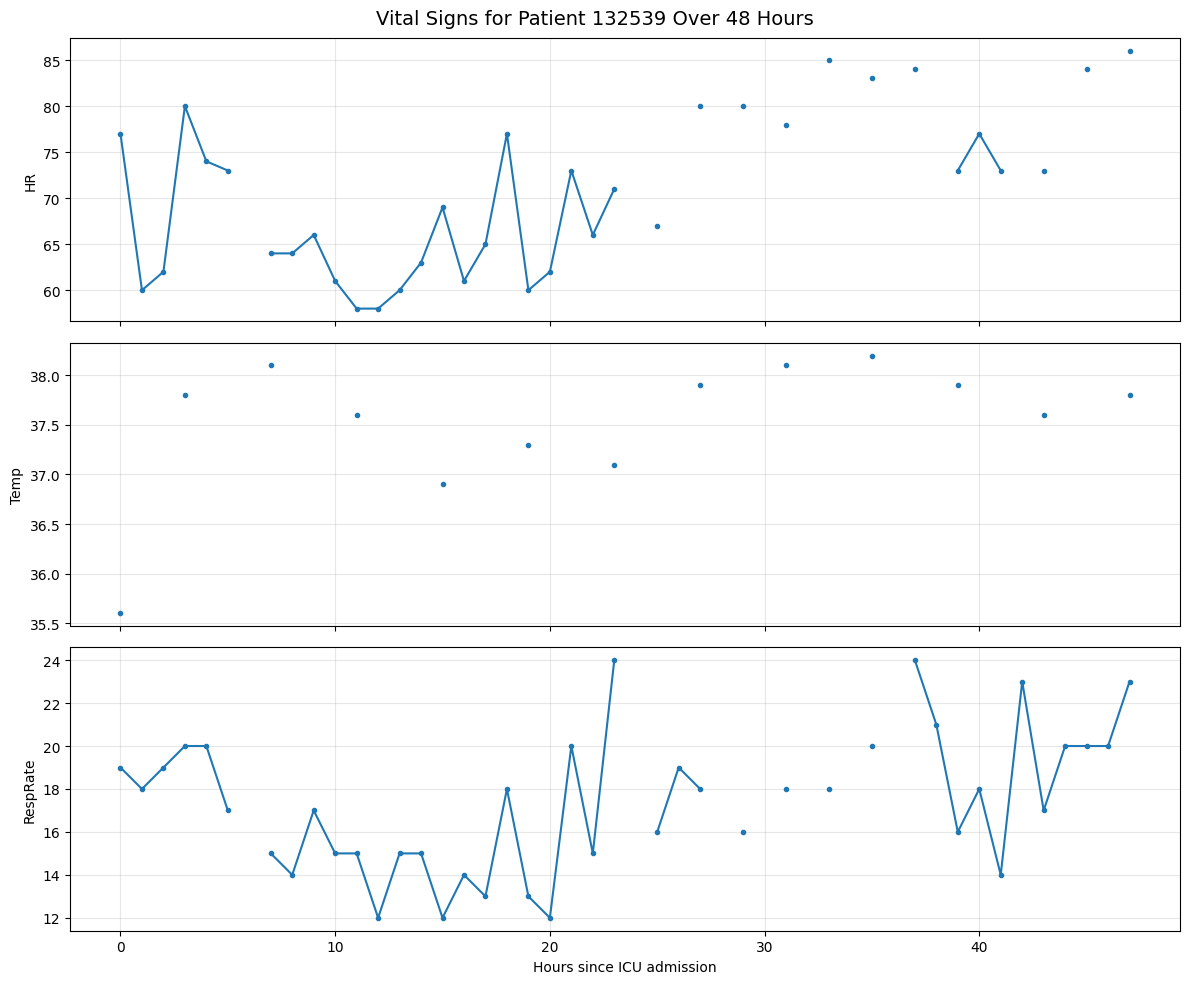

In [33]:
# Select a few vital signs to visualize
vital_signs = ["HR", "Temp", "RespRate"]

fig, axes = plt.subplots(len(vital_signs), 1, figsize=(12, 10), sharex=True)
fig.suptitle(f"Vital Signs for Patient {patient_id} Over 48 Hours", fontsize=14)

for idx, var_name in enumerate(vital_signs):
    if var_name in edata.var_names:
        # Get the data for this variable
        var_idx = np.where(edata.var_names == var_name)[0][0]
        data = edata[patient_id].layers["tem_data"].squeeze()[var_idx, :]

        # Plot
        axes[idx].plot(range(edata.n_t), data, marker="o", linestyle="-", markersize=3)
        axes[idx].set_ylabel(var_name)
        axes[idx].grid(visible=True, alpha=0.3)

axes[-1].set_xlabel("Hours since ICU admission")
plt.tight_layout()
plt.show()

The good news: You don't need to write a lot of code for such visualizations anymore!

`ehrapy` has many utility functions for processing and vizualizing data in the `EHRData` format - for a fancy version of this plot here, available interactively powered by `bokeh`, see for instance :func:`~ehrapy.plot.timeseries`

## Subsetting and Filtering

`EHRData` supports powerful subsetting operations similar to numpy arrays:


In [27]:
# Filter by patients - get only those who died in hospital
deceased = edata[edata.obs["In-hospital_death"] == 1]
print(f"Deceased patients: {deceased.n_obs}")

# Filter by variables - get only cardiovascular measurements
cardio_vars = ["HR", "SysABP", "NIDiasABP", "MAP"]
cardio_data = edata[:, cardio_vars]
print(f"Cardiovascular data shape: {cardio_data.layers['tem_data'].shape}")

# Filter by time - get only the first 24 hours
first_24h = edata[:, :, :24]
print(f"First 24 hours shape: {first_24h.layers['tem_data'].shape}")

# Combined filtering
subset = edata[edata.obs["Gender"] == 0.0, cardio_vars, :12]
print(f"Female patients, cardiovascular vars, first 12h: {subset.layers['tem_data'].shape}")

Deceased patients: 1707
Cardiovascular data shape: (48, 4, 48)
First 24 hours shape: (11988, 37, 24)
Female patients, cardiovascular vars, first 12h: (12, 4, 48)


## Choosing different time intervals

Depending on the question at hand, different time intervals are of interest.

For the `physionet2012()`, in the intensive care unit setting, the observations of patient data happen within minutes to hours, and usually only for a few days.

For observational health data, the observations happen rather across weeks or months, and span for many years.

The `physionet2012()` function provides arguments to specify more about the time intervals:


In [ ]:
# Load with different time resolution (2-hour intervals)
edata_2h = ed.dt.physionet2012(
    interval_length_number=2,
    interval_length_unit="h",
    num_intervals=24,  # 48 hours / 2 hours = 24 intervals
    layer="tem_data",
)
print(f"2-hour intervals shape: {edata_2h.layers['tem_data'].shape}")

2-hour intervals shape: (11988, 37, 24)


If we plot this again, we can see the data is less fine-grained now:

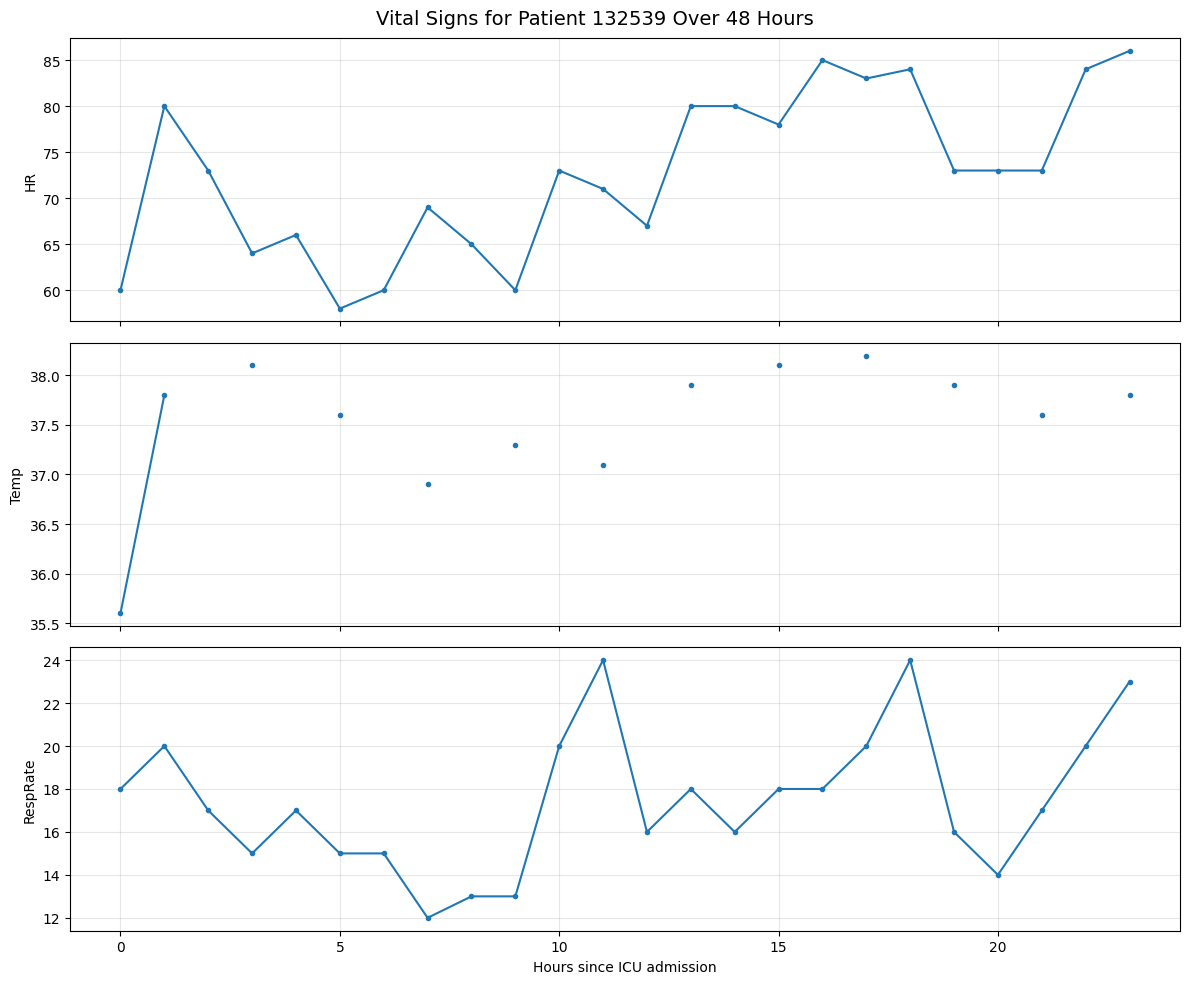

In [34]:
# Select a few vital signs to visualize
vital_signs = ["HR", "Temp", "RespRate"]

fig, axes = plt.subplots(len(vital_signs), 1, figsize=(12, 10), sharex=True)
fig.suptitle(f"Vital Signs for Patient {patient_id} Over 48 Hours", fontsize=14)

for idx, var_name in enumerate(vital_signs):
    if var_name in edata.var_names:
        # Get the data for this variable
        var_idx = np.where(edata_2h.var_names == var_name)[0][0]
        data = edata_2h[patient_id].layers["tem_data"].squeeze()[var_idx, :]

        # Plot
        axes[idx].plot(range(edata_2h.n_t), data, marker="o", linestyle="-", markersize=3)
        axes[idx].set_ylabel(var_name)
        axes[idx].grid(visible=True, alpha=0.3)

axes[-1].set_xlabel("Hours since ICU admission")
plt.tight_layout()
plt.show()

## Summary

In this tutorial, we learned:

- ✅ How to load the PhysioNet 2012 dataset with `ed.dt.physionet2012()`
- ✅ The structure of `EHRData` objects with three dimensions: obs × vars × tem
- ✅ How to visualize individual patient trajectories
- ✅ How to subset and filter the data
- ✅ How to customize the data loading parameters

## Next Tutorial

Continue with **[OMOP Introduction](omop_intro)** to learn how to read OMOP Common Data Model data into ehrdata.

## Further Resources

- **[PhysioNet 2012 Challenge](https://physionet.org/content/challenge-2012/)** - The original challenge and dataset description